In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path, num_classes):
    data = load_files(path, random_state=1)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), num_classes)
    return files, targets

# load list of character names
char_names = [item[42:-1] for item in sorted(glob("../char_gen/generated_char_split/train/*/"))]
num_classes = len(char_names)

# load train, test, and validation datasets
train_files, train_targets = load_dataset('../char_gen/generated_char_split/train', num_classes)
valid_files, valid_targets = load_dataset('../char_gen/generated_char_split/valid', num_classes)

# print statistics about the dataset
print('There are %d total character categories.' % len(char_names))
print('There are %s total character images.\n' % len(np.hstack([train_files, valid_files])))
print('There are %d training character images.' % len(train_files))
print('There are %d validation character images.' % len(valid_files))

Using TensorFlow backend.


There are 61 total character categories.
There are 17568 total character images.

There are 14091 training character images.
There are 3477 validation character images.


In [2]:
print(train_files[0:5])
print(train_targets[0:5])

['../char_gen/generated_char_split/train/53.}/1-17036_GillSans_fs_26_bc_125_}.png'
 '../char_gen/generated_char_split/train/10.K/1-5127_arial_fs_23_bc_100_K.png'
 '../char_gen/generated_char_split/train/54.[/1-8312_arial_fs_26_bc_65_[.png'
 '../char_gen/generated_char_split/train/13.N/1-1003_swiss_fs_28_bc_120_N.png'
 '../char_gen/generated_char_split/train/16.Q/1-5566_arial_fs_23_bc_135_Q.png']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(30, 30), grayscale=True)
    # convert PIL.Image.Image type to 3D tensor with shape (30, 30, 1)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [4]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# Load the data
train_tensors = paths_to_tensor(train_files)

valid_tensors = paths_to_tensor(valid_files)

  0%|          | 0/14091 [00:00<?, ?it/s]/home/chedanix/.local/lib/python2.7/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 3477/3477 [00:00<00:00, 8406.20it/s] 


In [5]:
print(train_tensors.shape)
print(train_targets.shape)

print(valid_tensors.shape)
print(valid_targets.shape)

(14091, 30, 30, 1)
(14091, 61)
(3477, 30, 30, 1)
(3477, 61)


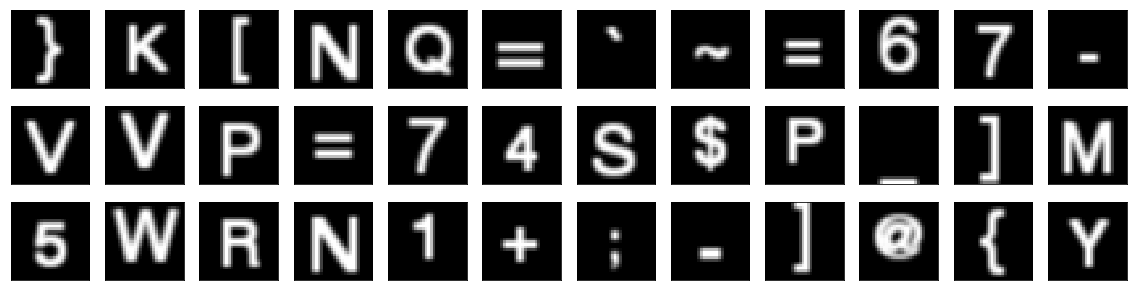

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(train_tensors[i]), cmap='gray')

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.05,  # randomly shift images horizontally
    height_shift_range=0.05,  # randomly shift images vertically
    horizontal_flip=False,  # randomly flip images horizontally
    rotation_range = 7,
    zoom_range = [1,1.15]) 

# fit augmented image generator on data
datagen_train.fit(train_tensors)

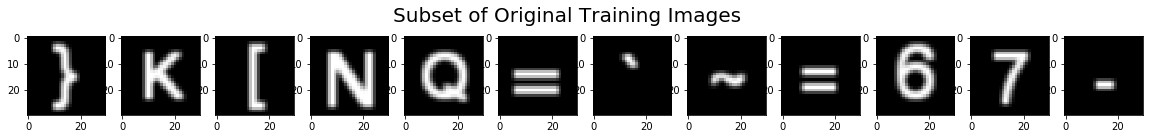

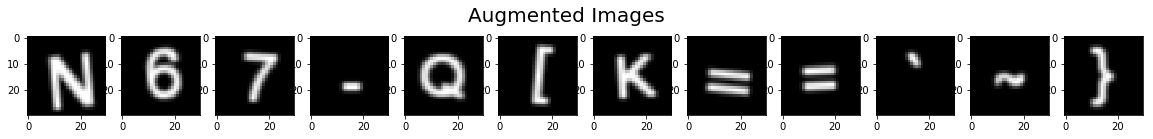

In [8]:
train_tensors_subset = train_tensors[0:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(train_tensors_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(np.squeeze(train_tensors[i]), cmap='gray')
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(train_tensors_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(np.squeeze(x_batch[i]), cmap='gray')
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

In [9]:
# Preprocess the data
train_tensors = train_tensors/255*2 - 1
valid_tensors = valid_tensors/255*2 - 1

In [10]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.models import Sequential
from keras import regularizers

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_tensors.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
__________

In [11]:
from keras.optimizers import RMSprop, Adam
#opt = Adam(lr=0.002, decay=0.01)
opt = RMSprop(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 30
batch_size= 128

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.hdf5', 
                               verbose=0, save_best_only=True)

hist = model.fit_generator(datagen_train.flow(train_tensors, train_targets, batch_size=batch_size),
                    steps_per_epoch=train_tensors.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(valid_tensors, valid_targets),
                    validation_steps=valid_tensors.shape[0] // batch_size)

Epoch 1/30
 - 5s - loss: 3.7097 - acc: 0.1469 - val_loss: 1.6869 - val_acc: 0.5154
Epoch 2/30
 - 2s - loss: 1.8664 - acc: 0.4685 - val_loss: 0.5360 - val_acc: 0.8418
Epoch 3/30
 - 2s - loss: 1.0914 - acc: 0.6779 - val_loss: 0.2781 - val_acc: 0.9143
Epoch 4/30
 - 2s - loss: 0.7125 - acc: 0.7928 - val_loss: 0.2000 - val_acc: 0.9290
Epoch 5/30
 - 2s - loss: 0.4874 - acc: 0.8631 - val_loss: 0.1496 - val_acc: 0.9433
Epoch 6/30
 - 2s - loss: 0.3500 - acc: 0.9055 - val_loss: 0.1198 - val_acc: 0.9551
Epoch 7/30
 - 2s - loss: 0.2602 - acc: 0.9332 - val_loss: 0.0675 - val_acc: 0.9767
Epoch 8/30
 - 2s - loss: 0.2054 - acc: 0.9457 - val_loss: 0.0584 - val_acc: 0.9756
Epoch 9/30
 - 2s - loss: 0.1566 - acc: 0.9606 - val_loss: 0.0296 - val_acc: 0.9919
Epoch 10/30
 - 2s - loss: 0.1249 - acc: 0.9699 - val_loss: 0.0239 - val_acc: 0.9928
Epoch 11/30
 - 2s - loss: 0.1043 - acc: 0.9743 - val_loss: 0.0165 - val_acc: 0.9957
Epoch 12/30
 - 2s - loss: 0.0887 - acc: 0.9773 - val_loss: 0.0175 - val_acc: 0.9948
E

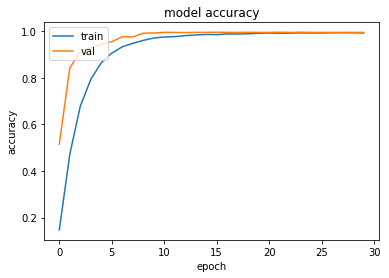

In [13]:
plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc'])
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'val'], loc='upper left') 
plt.show() 

In [14]:
### TODO: Load the model weights with the best validation loss.
model.load_weights('saved_models/weights.best.hdf5')

In [15]:
'''
from matplotlib.colors import NoNorm
abc = path_to_tensor('../char_gen/generated_char_split/train/07.H/1-3286_arial_fs_23_bc_135_H.png')
abc = abc/255
print(abc.shape)
plt.figurewd3
plt.imshow(np.squeeze(abc), cmap='gray', norm=NoNorm())
predicted_vec = model.predict(abc)
prediction = char_names[np.argmax(predicted_vec)]
print(prediction)
'''

"\nfrom matplotlib.colors import NoNorm\nabc = path_to_tensor('../char_gen/generated_char_split/train/07.H/1-3286_arial_fs_23_bc_135_H.png')\nabc = abc/255\nprint(abc.shape)\nplt.figurewd3\nplt.imshow(np.squeeze(abc), cmap='gray', norm=NoNorm())\npredicted_vec = model.predict(abc)\nprediction = char_names[np.argmax(predicted_vec)]\nprint(prediction)\n"

In [16]:
# dictionary for max_score

# Video Capture Test
# Display contour image for color image
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

capital_letters = ['A','B','C','D','E','F','G','H','I','J','K', \
                   'L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    contourIM = frame.copy()
    gray = cv2.cvtColor(contourIM, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray,165,255,cv2.THRESH_BINARY)

    kernel33 = np.ones((3,3),np.uint8)
    kernel22 = np.ones((2,2),np.uint8)
    #mask = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel22)
    mask = cv2.dilate(threshold,kernel33,iterations = 4)

    #findContours() does not modify its input image
    _, contours,_ = cv2.findContours(mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_area = pd.Series([cv2.contourArea(contour) for contour in contours])
    contours_area = contours_area[contours_area > 120]
    contours_area = contours_area[contours_area < 350]
    contours = [contours[i] for i in contours_area.index]
    contours_bb = [cv2.boundingRect(cnt) for cnt in contours]
    
    max_score = {}
    loc = {}
    #drawContours() modifies its input image
    #cv2.drawContours(contourIM, contours, -1,(0,255,0),1)
    for i,(x,y,w,h) in enumerate(contours_bb):
        if h > w:
            diff = h-w
            w = h
            x -= (diff/2 + 1)
        if w > h:
            diff = w-h
            h = w
            y -= diff/2
        
        char_img = gray[y:y+h,x:x+w].copy()
        if char_img.shape[0] == 0 or char_img.shape[1] == 0:
            continue
        char_img = cv2.resize(char_img, (30,30), interpolation=cv2.INTER_CUBIC)
        char_img = char_img.astype(np.float32)
        char_img = char_img/255*2 - 1
        char_img = np.expand_dims(char_img, axis=0)
        char_img = char_img[..., np.newaxis]
        predicted_vec = model.predict(char_img)
        score = np.amax(predicted_vec, axis=1)[0]
        prediction = char_names[np.argmax(predicted_vec)]
    
        if score > max_score.get(prediction, 0) and prediction in capital_letters:# and prediction!='I':
            max_score[prediction] = score
            loc[prediction] = (x,y,w,h)
    
    #if 'sym_num' in max_score: del max_score['sym_num']
    #if 'I' in max_score: del max_score['I']
    for c in loc:
        x,y,w,h = loc[c]
        contourIM = cv2.rectangle(contourIM,(x,y),(x+w,y+h),(0,255,0),1)
        contourIM = cv2.putText(contourIM, '{},{:.0f}'.format(c,max_score[c]*100), (x,y-2), \
                                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0))
        #contourIM = cv2.putText(contourIM, '{}'.format(c), (x,y-2), \
        #                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0))
        
    cv2.imshow('contourIM',contourIM)
    cv2.imshow('mask',mask)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
print("Number of contours: {}".format(len(contours)))
cv2.destroyAllWindows()
cap.release()


Number of contours: 0


In [17]:
cv2.destroyAllWindows()
cap.release()

In [18]:
# dictionary for max_score

# Video Capture Test
# Display contour image for color image
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

capital_letters = ['A','B','C','D','E','F','G','H','I','J','K', \
                   'L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    contourIM = frame.copy()
    gray = cv2.cvtColor(contourIM, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray,165,255,cv2.THRESH_BINARY)

    kernel33 = np.ones((3,3),np.uint8)
    kernel22 = np.ones((2,2),np.uint8)
    #mask = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel33)
    mask = cv2.dilate(threshold,kernel33,iterations = 4)

    #findContours() does not modify its input image
    _, contours,_ = cv2.findContours(mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours_area = pd.Series([cv2.contourArea(contour) for contour in contours])
    contours_area = contours_area[contours_area > 120]
    contours_area = contours_area[contours_area < 350]
    contours = [contours[i] for i in contours_area.index]
    contours_bb = [cv2.boundingRect(cnt) for cnt in contours]
    
    max_score = {}
    loc = {}
    #drawContours() modifies its input image
    #cv2.drawContours(contourIM, contours, -1,(0,255,0),1)
    for i,(x,y,w,h) in enumerate(contours_bb):
        if h > w:
            diff = h-w
            w = h
            x -= (diff/2 + 1)
        if w > h:
            diff = w-h
            h = w
            y -= diff/2
        
        
        char_img = gray[y:y+h,x:x+w].copy()
        if char_img.shape[0] == 0 or char_img.shape[1] == 0:
            continue
        char_img = cv2.resize(char_img, (30,30), interpolation=cv2.INTER_CUBIC)
        char_img = char_img.astype(np.float32)
        char_img = char_img/255*2 - 1
        char_img = np.expand_dims(char_img, axis=0)
        char_img = char_img[..., np.newaxis]
        predicted_vec = model.predict(char_img)
        score = np.amax(predicted_vec, axis=1)[0]
        prediction = char_names[np.argmax(predicted_vec)]
        
        #if prediction in capital_letters:
        contourIM = cv2.rectangle(contourIM,(x,y),(x+w,y+h),(0,255,0),1)
        #contourIM = cv2.putText(contourIM, '{},{:.0f}'.format(prediction, score*100), (x,y-2), \
        #                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0))
        contourIM = cv2.putText(contourIM, '{},{}'.format(prediction, contours_area.iloc[i]), (x,y-2), \
                               cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0))
        
    cv2.imshow('contourIM',contourIM)
    cv2.imshow('mask',mask)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
print("Number of contours: {}".format(len(contours)))
cv2.destroyAllWindows()
cap.release()


Number of contours: 4


In [19]:
cv2.destroyAllWindows()
cap.release()